# Quantum-Noise Limited Sensitivity of Advanced LIGO

This example shows how to compute the quantum-noise limited sensitivity of an interferometric gravitational wave detector with FINESSE.

## The Optical Configuration

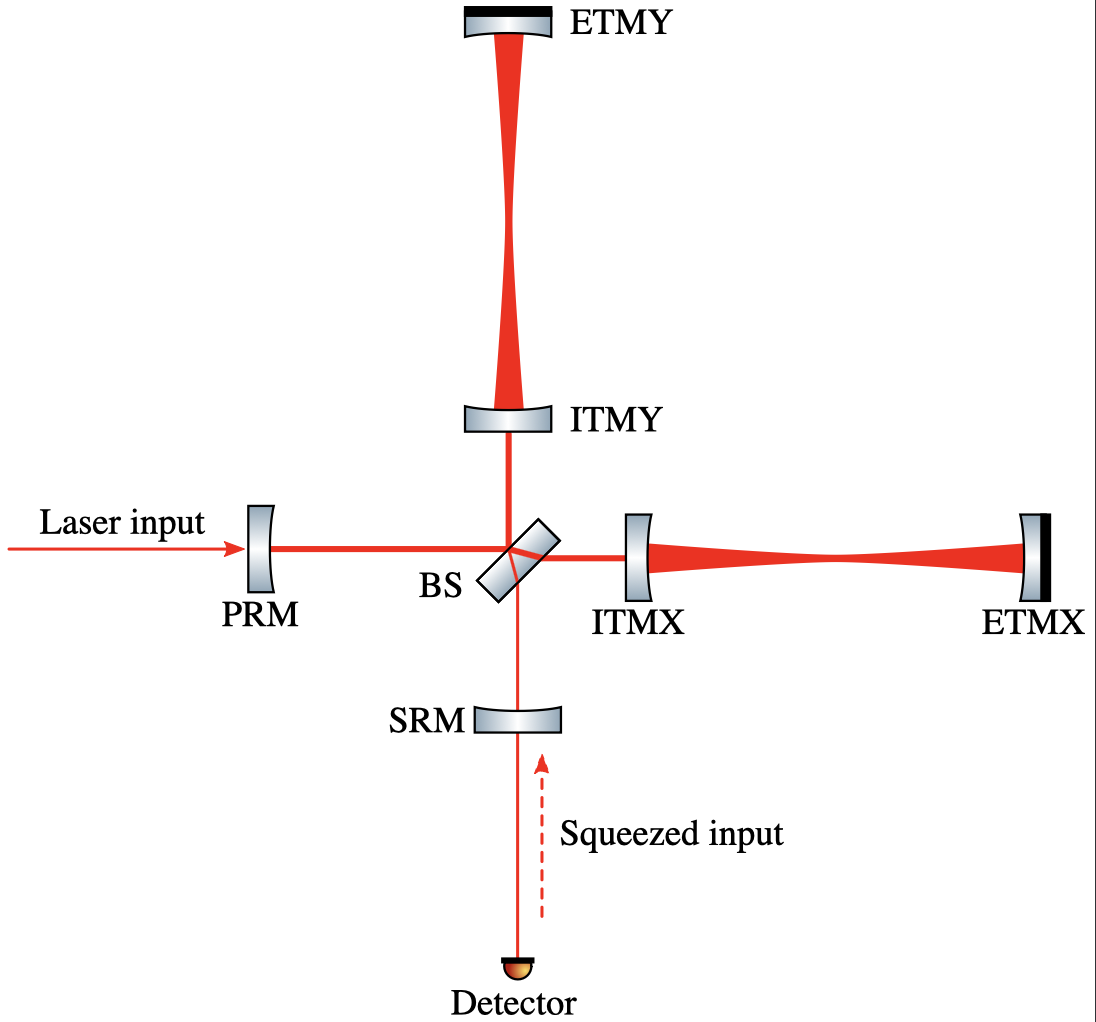

The optical layout is a very much simplified version of the Advanced LIGO interferometer, a Michelson interferometer with Fabry-Perot cavities in the arms, power recycling and signal recycling. Squeezed light is injected into the so-called dark port, which is also the main detection port, for which we measure the sensitivity.

In [1]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    ###########################################################################
    ###   Variables
    ###########################################################################
    var Larm 3995
    var Mtm  40
    var itmT 0.014
    var lmichx 4.5
    var lmichy 4.45

    ###########################################################################
    ###   Input optics
    ###########################################################################
    l L0 125
    s l_in L0.p1 prm.p1
    # Power recycling mirror
    m prm T=0.03 L=37.5u phi=90
    s prc prm.p2 bs.p1 L=53


    # Central beamsplitter
    bs bs T=0.5 L=0 alpha=45

    ###########################################################################
    ###   X arm
    ###########################################################################
    s lx bs.p3 itmx.p1 L=lmichx
    m itmx T=itmT L=37.5u phi=90
    s LX itmx.p2 etmx.p1 L=Larm
    m etmx T=5u L=37.5u phi=89.999875

    pendulum itmx_sus itmx.mech mass=Mtm fz=1 Qz=1M
    pendulum etmx_sus etmx.mech mass=Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Y arm
    ###########################################################################
    s ly bs.p2 itmy.p1 L=lmichy
    m itmy T=itmT L=37.5u phi=0
    s LY itmy.p2 etmy.p1 L=Larm
    m etmy T=5u L=37.5u phi=0.000125

    pendulum itmy_sus itmy.mech mass=Mtm fz=1 Qz=1M
    pendulum etmy_sus etmy.mech mass=Mtm fz=1 Qz=1M

    ###########################################################################
    ###   Output and squeezing
    ###########################################################################
    s src bs.p4 srm.p1 L=50.525
    m srm T=0.2 L=37.5u phi=-90

    # A squeezed source could be injected into the dark port
    sq sq1 db=0 angle=90
    s lsqz sq1.p1 srm.p2

    # Differentially modulate the arm lengths
    fsig(1)
    sgen darmx LX.h
    sgen darmy LY.h phase=180

    # Output the full quantum noise limited sensitivity
    qnoised NSR_with_RP srm.p2.o nsr=True
    # Output just the shot noise limited sensitivity
    qshot NSR_without_RP srm.p2.o nsr=True

    # We could also display the quantum noise and the signal
    # separately by uncommenting these two lines.
    # qnoised noise srm.p2.o
    # pd1 signal srm.p2.o f=fsig

    xaxis(darmx.f, log, 5, 5k, 100)
    """
)

The file sets up all the various optical cavities using a plane wave model. The arm cavity mirrors are suspended from a simple pendulum with a resonance at 1 Hz. A gravitational wave signal is injected as a modulation to both arm 'spaces', out of phase by 180 degrees. We then use the **qnoised** and **qshot** detectors to output the noise-to-signal ratio, or the sensitivity.

## Output Plots

/Users/jessicaross/anaconda3/envs/finesse/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jessicaross/anaconda3/envs/finesse/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


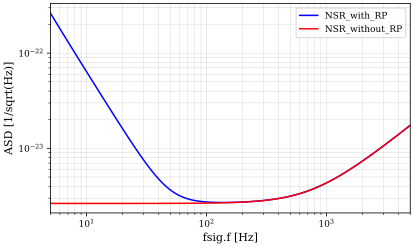

In [2]:
out = kat.run()
out.plot(log=True, separate=False);

This model is loosely based on the Advanced LIGO design file, so we expect to see peak sensitivity around 100 Hz at a sensitivity of about $10^{-23}/\sqrt{\text{Hz}}$. We can see that both the **qnoised** and **qshot** agree at high frequencies, because they both model shot noise correctly. At low frequencies we see that they differ, as only **qnoised** takes into account the radiation pressure effects.